# Переобучение и недообучение

**Недообучение (underfitting)** — негативное явление, при котором алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке. Недообучение возникает при использовании недостаточно сложных моделей.

С точки зрения математики недообучение — ситуация, когда в параметрическом семействе функций не удается найти функцию, которая хорошо описывает данные. Самая частая причина недообучения — когда сложность устройства данных выше, чем сложность устройства модели, которую придумал исследователь. Решением для такой проблемы будет усложнение модели и поиск лучшего описания эффектов, которые есть в данных.

Возможные решения при недообучении
* Добавление новых параметров модели;
* Использование для описания модели функций с более высокой степенью;
* Уменьшение коэффициента регуляризации.

<img src = "https://www.researchgate.net/publication/359896238/figure/fig1/AS:1144038711402499@1649771492927/Examples-of-model-underfitting-model-fitting-good-and-a-model-overfitting-to-the-data.png" width="1000pt">

**Переобучение (overfitting)** — негативное явление, возникающее, когда алгоритм обучения вырабатывает предсказания, которые слишком близко или точно соответствуют конкретному набору данных и поэтому не подходят для применения алгоритма к дополнительным данным или будущим наблюдениям.

Возможные решения при переобучении:
* Увеличение количества данных в наборе;
* Уменьшение количества параметров модели;
* Добавление регуляризации / увеличение коэффициента регуляризации.

# Борьба с переобучением

Регуляризация (regularization) в статистике, машинном обучении, теории обратных задач — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Чаще всего эта информация имеет вид штрафа за сложность модели.

Рассмотрим несколько методов регуляризации:
* dropout;
* ранняя остановка;
* batch-normalization.

# Dropout (метод прореживания, метод исключения)

Оригинальная статья: https://arxiv.org/pdf/1207.0580.pdf

Хорошая выжимка с математикой на Хабр: https://habr.com/ru/companies/wunderfund/articles/330814/

Главная идея Dropout — вместо обучения одной DNN обучить ансамбль нескольких DNN, а затем усреднить полученные результаты.

Сети для обучения получаются с помощью исключения из сети (dropping out) нейронов с вероятностью $p$, таким образом, вероятность того, что нейрон останется в сети, составляет $q=1-p$. Исключение нейрона означает, что при любых входных данных или параметрах он возвращает 0.

Исключенные нейроны не вносят свой вклад в процесс обучения ни на одном из этапов алгоритма обратного распространения ошибки (backpropagation); поэтому исключение хотя бы одного из нейронов равносильно обучению новой нейронной сети.

Резюмируя, Dropout - метод регуляризации, применимый именно к нейронным сетям и заключающийся в следующем:

1. во время обучения с вероятностью $p$ **зануляем выход нейронов** слоя (например, $p = 0.5$);
2. зануленные нейроны не участвуют в данном `forward`, и поэтому градиент к ним при `backward` не идет;
3. сила регуляризации определяется вероятностью $p$: чем она больше, тем сильнее регуляризация.

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/dropout.png" width="700">

При построении нейронной сети используйте уже реализованные nn.Dropout (для полносвязного слоя) или nn.Dropout2d (для сверточного слоя).
Посмотрим на простейшем примере, как работает этот слой:

In [1]:
import torch
import torch.nn  as nn
input = torch.randn(5, 5)
print(input)

tensor([[-0.7124, -0.4157, -0.8215,  0.1130,  0.7184],
        [-1.0742, -0.8989, -0.2166,  0.6189, -0.2466],
        [ 1.0282, -0.0780, -0.8034,  0.2864, -0.3630],
        [-0.3928, -0.2306, -1.6906,  0.0779, -0.9836],
        [-0.4350,  1.8201,  0.6197, -1.9060,  2.3141]])


In [2]:
m = nn.Dropout(p=0.5)
output = m(input)
print(output)

tensor([[-1.4248, -0.8314, -0.0000,  0.0000,  1.4367],
        [-0.0000, -0.0000, -0.0000,  0.0000, -0.0000],
        [ 2.0564, -0.0000, -0.0000,  0.5729, -0.7261],
        [-0.0000, -0.4611, -0.0000,  0.1558, -1.9672],
        [-0.0000,  3.6401,  0.0000, -0.0000,  0.0000]])


## Пример модели с Dropout и без неё:

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [4]:
N = 50  # number of data points
noise = 0.3

# generate the train data
x_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_train = x_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

# generate the test data
x_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_test = x_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}")

x_train shape: torch.Size([50, 1])
x_test shape: torch.Size([50, 1])


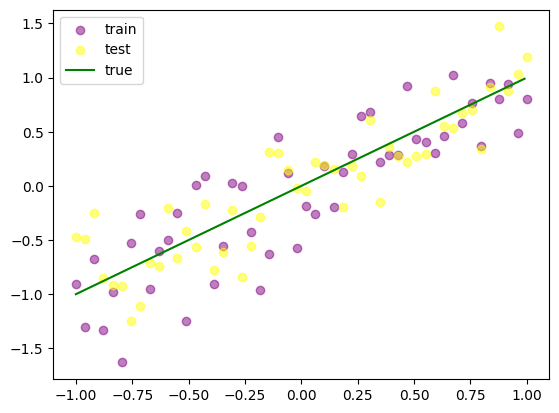

In [5]:
plt.scatter(
    x_train.data.numpy(), y_train.data.numpy(), c="purple", alpha=0.5, label="train"
)
plt.scatter(
    x_test.data.numpy(), y_test.data.numpy(), c="yellow", alpha=0.5, label="test"
)

x_real = np.arange(-1, 1, 0.01)
y_real = x_real
plt.plot(x_real, y_real, c="green", label="true")
plt.legend()
plt.show()

Модель **без Dropout**:

In [6]:
N_h = 100  # num of neurons
model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Модель **c Dropout**:

In [7]:
N_h = 100  # num of neurons

model_dropout = nn.Sequential(
    nn.Linear(1, N_h),
    nn.Dropout(p=0.5),  # 50 % probability
    nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    nn.Dropout(p=0.2),  # 20% probability
    nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)
optimizer_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)

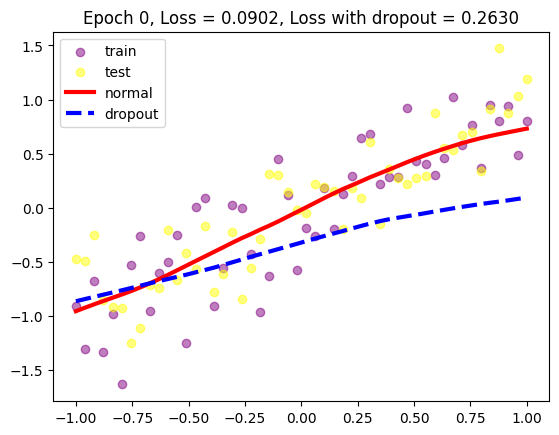

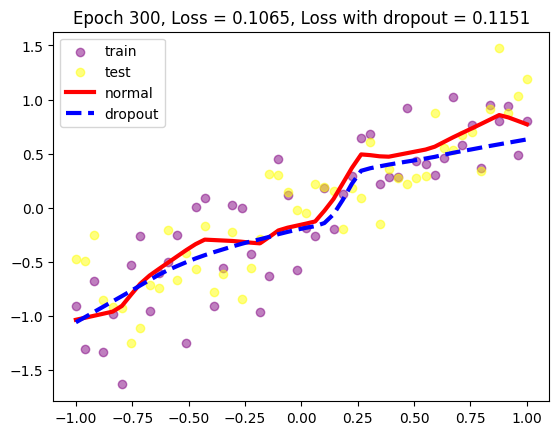

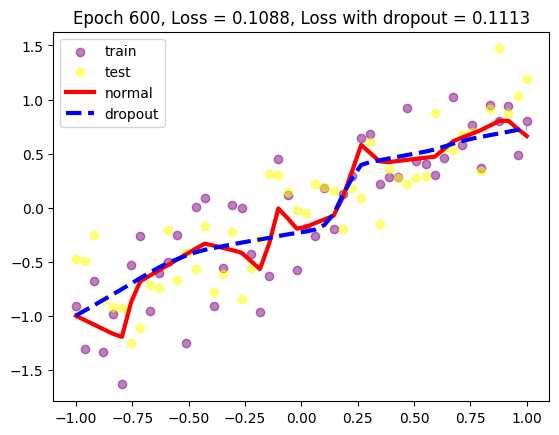

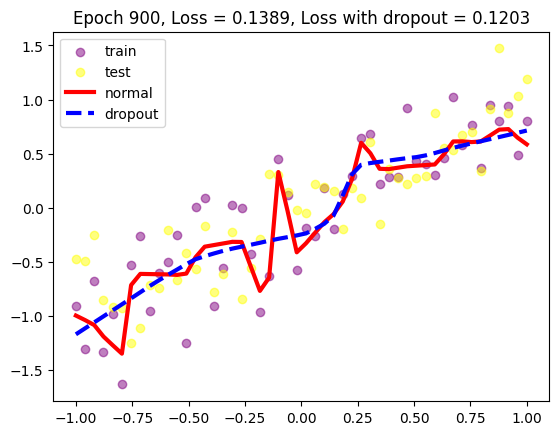

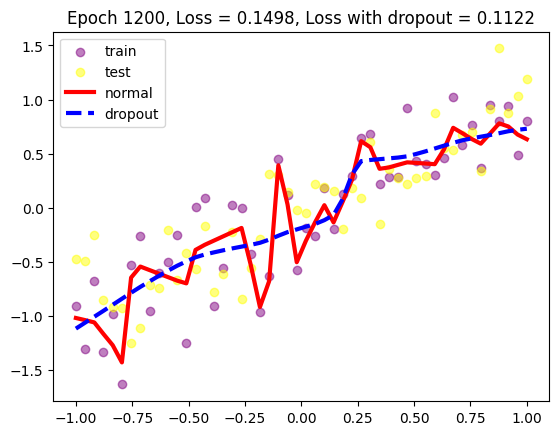

In [8]:
num_epochs = 1500
criterion = torch.nn.MSELoss()

for epoch in range(num_epochs):
    # train without dropout
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # train with dropout
    y_pred_dropout = model_dropout(x_train)
    loss_dropout = criterion(y_pred_dropout, y_train)

    optimizer.zero_grad()  # обнуляем градиенты
    optimizer_dropout.zero_grad()

    loss.backward(retain_graph=True)  # обратное распространение ошибки
    loss_dropout.backward()

    optimizer.step()  # обновляем параметры модели
    optimizer_dropout.step()


    if epoch % 300 == 0:
        model.eval()  # режим оценки для тестирования
        model_dropout.eval()

        y_test_pred = model(x_test)  # генерация прогнозов на тестовом наборе данных
        test_loss = criterion(y_test_pred,y_test)  # вычисление потерь

        y_test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = criterion(y_test_pred_dropout,y_test)

        # plotting data and predictions
        plt.scatter(
            x_train.data.numpy(),
            y_train.data.numpy(),
            c="purple",
            alpha=0.5,
            label="train",
        )
        plt.scatter(
            x_test.data.numpy(),
            y_test.data.numpy(),
            c="yellow",
            alpha=0.5,
            label="test",
        )
        plt.plot(
            x_test.data.numpy(), y_test_pred.data.numpy(), "r-", lw=3, label="normal"
        )
        plt.plot(
            x_test.data.numpy(),
            y_test_pred_dropout.data.numpy(),
            "b--",
            lw=3,
            label="dropout",
        )

        plt.title(
            "Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f"
            % (epoch, test_loss, test_loss_dropout)
        )

        plt.legend()

        # возвращение моделей в режим обучения
        model.train()  # train mode
        model_dropout.train()  # train mode

        plt.pause(0.05)

Видим, что **нейронная сеть без Dropout сильно переобучилась**.

## Ранняя остановка

Ранняя остановка — форма регуляризации, используемая во избежание переобучения набора обучающих данных. Ранняя остановка отслеживает потери при проверке, если потери перестают уменьшаться в течение нескольких эпох подряд, обучение прекращается. Класс EarlyStopping используется для создания объекта для отслеживания потерь при проверке во время обучения модели PyTorch. Контрольная точка модели будет сохраняться каждый раз, когда потери при проверке уменьшаются.

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/early_stopping.png" width="500">

Реализуем метод и проверим его на примере полносвязной нейронной сети, обученной для распознавания набора данных MNIST.

### Шаг 1. Подключим необходимые библиотеки

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Шаг 2. Загрузим данные и разделим их на три типа: train, test, validation.

In [10]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

def create_datasets(batch_size):

    valid_size = 0.2   ## доля тестового набора (test), которое будет использоваться для проверки (validation)

    transform = transforms.ToTensor() ### перевести  изображение в тензор

    train_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
    test_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

    # зададим индексы из тренировочного множества, которые будем использовать для проверочноего множества
    # Индексы для тренировочных данных перемешиваются и разделяются, чтобы отделить часть для валидационного набора данных
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[:split], indices[split:]

    # составим множество примеров, которые будем использовтаь для тренировочного и проверочного множества
    # Они определяют, какие индексы из тренировочного набора данных будут использоваться для обучения, а какие для валидации
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # загрузим тренировочные данные в батчи
    train_loader = torch.utils.data.DataLoader(train_data, sampler = train_sampler, batch_size=batch_size)

    # загрузим тестовые данные в батчи
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

    # загрузим проверочные данные в батчи
    valid_loader = torch.utils.data.DataLoader(train_data, sampler = valid_sampler, batch_size=batch_size)

    return train_loader, test_loader, valid_loader

### Шаг 3. Создадим архитектуру простой полносвязной сети

Сеть для распознавания рукописных цифр будет состоять из двух полносвязных слоёв с функцией активации ReLU, состоящих из 128 нейронов и одного выходного слоя. После каждого внутреннего слоя добавим слой Dropout(0.5).

Net( <br>
  (fc1): Linear(in_features=784, out_features=128, bias=True) <br>
  (fc2): Linear(in_features=128, out_features=128, bias=True) <br>
  (fc3): Linear(in_features=128, out_features=10, bias=True) <br>
  (dropout): Dropout(p=0.5, inplace=False) <br>
)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # вызов конструктора базового класса
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)  # 10 выходных классов
        self.dropout = nn.Dropout(p = 0.5)

    def forward(self, x):
      relu = nn.ReLU()
      x = relu(self.dropout(self.fc1(x)))
      x = relu(self.dropout(self.fc2(x)))
      x = self.fc3(x)
      return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


### Шаг 4.

Выберем кросс-энтропию в качестве функции потерь и оптимизатор ADAM.

In [12]:
# функция потерь, которая ожидает на вход логиты (то есть необработанные предсказания модели) и целевые классы в виде индексов.
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Шаг 5. Релизуем процесс ранней остановки как класс EarlyStopping.

In [13]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience  ## Количество эпох для ожидания улучшения ошибки валидации перед остановкой.
        self.verbose = verbose    ## если параметр True, вывести сообщение об улучшении validation loss
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta   ## Минимальное изменение ошибки валидации, которое считается улучшением.
        self.path = path    ## путь, по которому можно сохранить точку остановки checkpoint
        self.trace_func = trace_func   ### вывод на экран текущего состояния

    # вызывается каждый раз после вычисления ошибки валидации
    # сравнивает текущую ошибку валидации (val_loss) с лучшей предыдущей (self.best_score) и решает, следует ли продолжать обучение
    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    # вызывается, когда текущая ошибка валидации меньше минимальной
    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

### Шаг 6. Тренировка модели с использованием метода ранней остановки

In [14]:
def train_model(model, batch_size, patience, n_epochs):

    train_losses = []
    valid_losses = []
    avg_train_losses = []
    avg_valid_losses = []

    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################

        model.train() # prep model for training

        for batch, (data, target) in enumerate(train_loader, 1):

            # Обнуляются градиенты оптимизатора.
            optimizer.zero_grad()
            data = data.view(data.shape[0], -1)

            # forward pass: Данные подаются на вход модели.
            y_pred = model(data)

            # Вычисляется потеря (loss) с помощью функции потерь.
            loss = criterion(y_pred, target)

            # backward pass: Выполняется обратное распространение ошибки.
            loss.backward()

            # Оптимизатор обновляет веса модели.
            optimizer.step()

            # record training loss
            train_losses.append(loss)

        ######################
        # validate the model #
        ######################

        model.eval() # prep model for evaluation

        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            data = data.view(data.shape[0], -1)
            y_val_pred = model(data)

            # calculate the loss
            val_loss = criterion(y_val_pred, target)

            # record validation loss
            valid_losses.append(val_loss)

        # print training/validation statistics
        # calculate average loss over an epoch
        train_loss = sum(train_losses)/len(train_losses)
        valid_loss = sum(valid_losses)/len(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        epoch_len = len(str(n_epochs))

        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')

        print(print_msg)

        # clear lists to track next epoch
        train_losses = []
        valid_losses = []

        # Вызывается early_stopping с текущей потерей валидации и моделью.
        # Если потеря валидации не улучшилась на протяжении заданного количества эпох (patience), активируется ранняя остановка.
        early_stopping(valid_loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Если сработала ранняя остановка, обучение прекращается, и загружается последняя лучшая модель из сохраненного чекпоинта
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [15]:
batch_size = 256
n_epochs = 100

train_loader, test_loader, valid_loader = create_datasets(batch_size)

# early stopping patience; how long to wait after last time validation loss improved.
patience = 20

model, train_loss, valid_loss = train_model(model, batch_size, patience, n_epochs)

100%|██████████| 9912422/9912422 [00:00<00:00, 106760696.42it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25653471.80it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27988682.12it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4767399.59it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

[  1/100] train_loss: 0.84381 valid_loss: 0.33851
Validation loss decreased (inf --> 0.338509).  Saving model ...
[  2/100] train_loss: 0.45865 valid_loss: 0.26269
Validation loss decreased (0.338509 --> 0.262688).  Saving model ...
[  3/100] train_loss: 0.38379 valid_loss: 0.24797
Validation loss decreased (0.262688 --> 0.247972).  Saving model ...
[  4/100] train_loss: 0.35478 valid_loss: 0.21936
Validation loss decreased (0.247972 --> 0.219361).  Saving model ...
[  5/100] train_loss: 0.33263 valid_loss: 0.20817
Validation loss decreased (0.219361 --> 0.208172).  Saving model ...
[  6/100] train_loss: 0.31943 valid_loss: 0.21787
EarlyStopping counter: 1 out of 20
[  7/100] train_loss: 0.29385 valid_loss: 0.21413
EarlyStopping counter: 2 out of 20
[  8/100] train_loss: 0.31236 valid_loss: 0.20395
Validation loss decreased (0.208172 --> 0.203953).  Saving model ...
[  9/100

### Шаг 7. Построение графика функции потерь и точки ранней остановки

По графику можно увидеть, что модель действительно закончила учиться перед тем, как начала переобучаться.

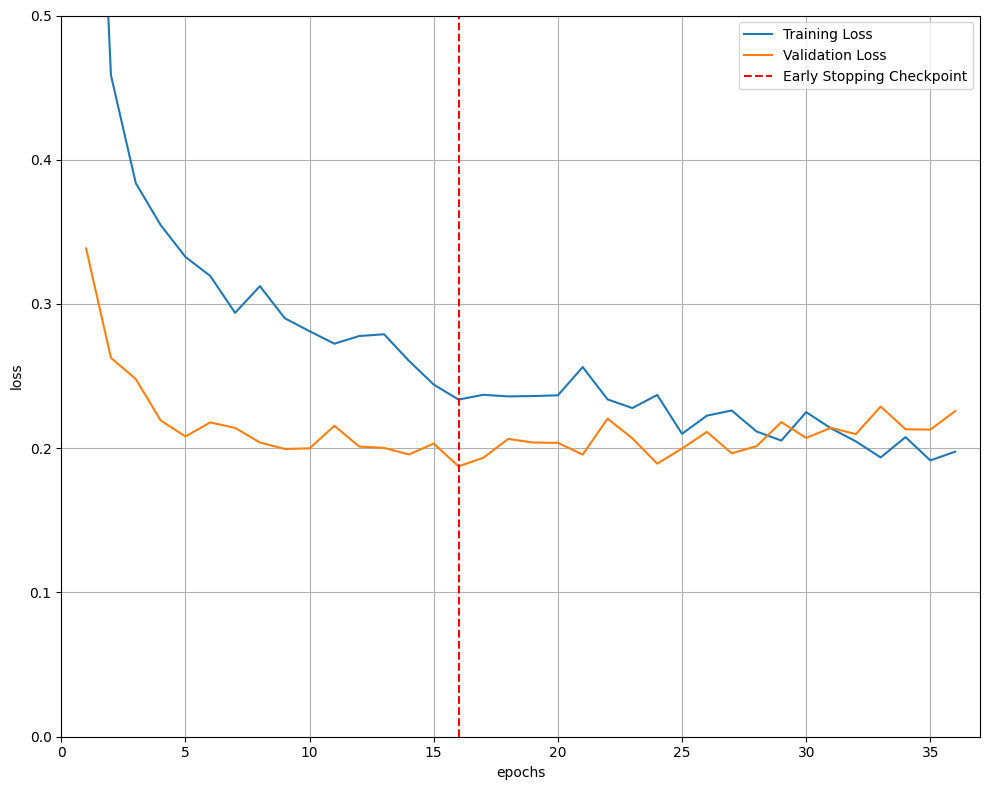

In [16]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
with torch.no_grad():
  train_loss = np.array(train_loss)
  valid_loss = np.array(valid_loss)
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.argmin()+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

### Шаг 8. Посчитаем accuracy натренированной сети с учётом метода ранней остановки

In [17]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    data = data.view(data.shape[0], -1)
    output = model(data)

    # calculate the loss
    loss = criterion(output, target)

    # update test loss
    test_loss += loss.item()*data.size(0)

    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)

    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.178939

Test Accuracy of     0: 98% (965/979)
Test Accuracy of     1: 97% (1109/1133)
Test Accuracy of     2: 93% (967/1030)
Test Accuracy of     3: 95% (964/1008)
Test Accuracy of     4: 96% (941/980)
Test Accuracy of     5: 94% (842/890)
Test Accuracy of     6: 95% (914/956)
Test Accuracy of     7: 93% (963/1027)
Test Accuracy of     8: 93% (909/973)
Test Accuracy of     9: 93% (941/1008)

Test Accuracy (Overall): 95% (9515/9984)


### Шаг 9. Посмотрим на результаты работы обученной нейронной сети

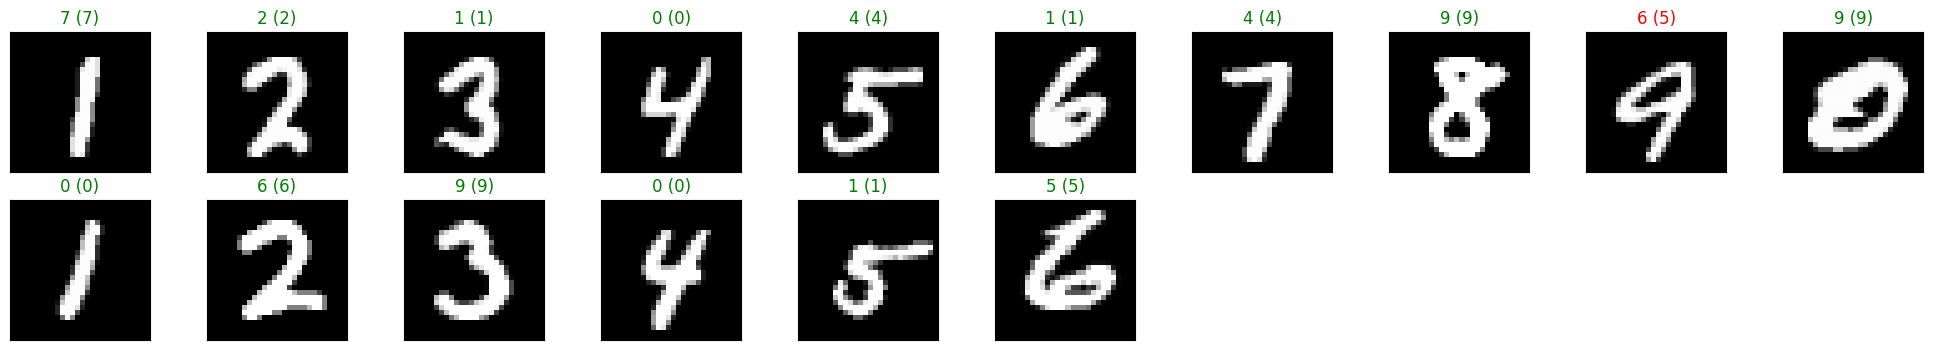

In [18]:
# obtain one batch of test images
images, labels  = next(iter(test_loader))

# get sample outputs
images = images.view(images.shape[0], -1)
output = model(images)

# convert output probabilities to predicted class
_, preds = torch.max(output, 1)

# prep images for display
images = data.view(-1, 28, 28)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(len(images)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Batch-normalization



Предварительно, напомним, что такое пакет (batch). Возможны два подхода к реализации алгоритма градиентного спуска для обучения нейросетевых моделей: стохастический и пакетный.

* Стохастический градиентный спуск (stochastic gradient descent) — реализация, в которой на каждой итерации алгоритма из обучающей выборки каким-то (случайным) образом выбирается только один объект;
* Пакетный (батч) (batch gradient descent) — реализация градиентного спуска, когда на каждой итерации обучающая выборка просматривается целиком, и только после этого изменяются веса модели.

Также существует "золотая середина" между стохастическим градиентным спуском и пакетным градиентным спуском — когда просматривается только некоторое подмножество обучающей выборки фиксированного размера (batch-size). В таком случае такие подмножества принято называть мини-пакетом (mini-batch). Обычно мини-пакеты также называют пакетами.

Нам надо дать нейронной сети **возможность перемещать распределение выходов** слоя из области 0 и самой **подбирать дисперсию**. Для этой цели используется **батч-нормализация** (*batch normalization*), которая вводит в нейронную сеть дополнительную операцию между соседними скрытыми слоями. Она состоит из **нормализации** входящих (в слой батч-нормализации) значений, полученных от скрытого слоя, **масштабирования** и **сдвига** с применением двух новых параметров и передачи полученных значений на вход следующему скрытому слою.

Другими словами, суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое математическое ожидание и единичную дисперсию.

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/batchnormalization.png" width="800">

Параметры, используемые в батч-нормализации ($\gamma$ — отвечающий за **сжатие** и $\beta$ — отвечающий за **сдвиг**), являются **обучаемыми параметрами** (наподобие весов и смещений скрытых слоев).

Помимо обучаемых параметров $\gamma$ и $\beta$ в слое батч-нормализации существуют также необучаемые параметры: **скользящее среднее матожидания** (_Mean Moving Average_) и **скользящее среднее дисперсий** (_Variance Moving Average_), служащие для сохранения состояния слоя батч-нормализации.

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/batchnorm_layer_parameters.png">

Параметры $\gamma$, $\beta$, а также оба скользящих средних вычисляются для каждого слоя батч-нормализации отдельно и являются векторами с **длиной, равной количеству входящих признаков.**

В процессе обучения мы подаем в нейронную сеть **по одному мини-батчу за раз**. Процедуру обработки значений одного признака $x^{(k)}$ (фиолетовая колонка на изображении ниже), который для краткости мы будем обозначать $x$,  из одного мини-батча $ B = \{x_{1},\ldots, x_{m}\} $ можно представить следующим образом:



<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/batch_normalization_compute_moving_average.png" width="1000">

Шаг **масштабирования** Gamma $γ$ и шаг **сдвига** Beta $β$ являются главным новшеством батч-нормализации, поскольку в отличие от предыдущего рассмотренного примера, нормированные значения больше не обязаны иметь среднее, равное 0, и единичную дисперсию. Батч-нормализация позволяет сдвигать среднее нормированных значений и масштабировать дисперсию. Фактически, теперь **нейросеть даже может отменить нормализацию входных данных, если считает ее ненужной.**

Для наглядности проиллюстрируем размерности промежуточных переменных на следующем изображении:

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/batch_normalization_compute_moving_average_scheme.png" width="1000">

После прямого прохода параметры $\gamma$ и $\beta$ **обновляются через обратное распространение ошибки** так же, как и веса скрытых слоев.

### Скользящее среднее

Выше мы обсуждали то, что в процессе обучения слой **батч-нормализации** рассчитывает значение **среднего и дисперсии** каждого признака в соответствующем **мини-батче**. Предположим, нам нужно сделать предсказание на **одном объекте.** Во время предсказания батч у нас уже отсутствует — откуда брать среднее и дисперсию?

Во время предсказания используется **скользящее среднее**, которое было **рассчитано и сохранено в процессе обучения**.

$$ \mu_{mov_{B}} = (1-\alpha)\mu_{mov_{B-1}}+\alpha\mu_{B} $$

$$ \sigma_{mov_{B}} = (1-\alpha)\sigma_{mov_{B-1}}+\alpha\sigma_{B} $$

Обычно используется параметр $\alpha = 0.1$

Для перевода модели из режима обучения в режим тестирования и обратно в PyTorch используются `model.train()` и `model.eval()`.

$$
\begin{array}{c|c}
\text{model.train()}&\ \text{model.eval()}\\  \hline
\text{Батч-нормализация использует статистику по батчу.}&\text{Батч-нормализация использует скользящие средние.}\\
\text{Cкользящие средние накапливаются.}
\end{array}
$$



Почему используется именно **скользящее среднее**, а **не статистика всей обучающей выборки**?

При таком подходе нам бы пришлось хранить **средние всех признаков** для **всех батчей**, пропущенных через нейросеть в ходе обучения. Это ужасно невыгодно по памяти. Вместо этого **скользящее среднее** выступает в качестве приближенной оценки **среднего и дисперсии** обучающего набора. В этом случае эффективность использования ресурсов увеличивается: нам нужно **хранить в памяти только одно число** — значение скользящего среднего, полученное на последнем шаге.

### Советы по использованию Batch Normalization

Стоит помнить, что с батч-нормализацией:

* **Крайне важно** перемешивать объекты (составлять новые батчи) между эпохами. Единицей обучения параметров $\beta$ и $\gamma$ являются батчи. Если их не перемешивать, то из 6400 объектов в тренировочном датасете получим лишь 100 объектов (при условии, что в батче 64 объекта) для обучения $\beta$ и $\gamma$.

* В слое, после которого поставили Batch Normalization, надо **убрать bias** (параметр $\beta$ в BatchNormalization берет эту роль на себя).


* Другое расписание **learning rate: большее значение** в начале обучения и быстрое уменьшение в процессе обучения.


* Чем **меньше размер батча в обучении**, тем **хуже** будет работать BatchNormalization.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L07/batchnorm_batch_size.png" width="550">

<em>Source: <a href="https://arxiv.org/pdf/1803.08494.pdf">Group Normalization</a></em>

Шаг 1. Подключаем необходимые библиотеки

In [19]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

Шаг 2. Загружаем набор данных MNIST

In [20]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0

# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training and test datasets
train_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
test_data = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, shuffle = True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

Шаг 3. Посмотрим на данные.

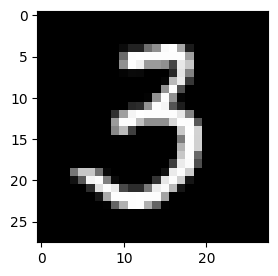

In [21]:
# obtain one batch of training images
dataiter = iter(train_loader)  # Создание итератора
images, labels = dataiter.__next__()  # Получение следующего пакета изображений и меток с помощью итератора
images = images.numpy()

# get one image from the batch
img = images[0][0]

fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

Шаг 4. Зададим архитектуру нейронной сети. Наша цель - сравнить эффективность обучения с Batch Normalization и без. Поэтому введём параметр, отвечающий за включение и выключение Batch Normalization и будет использовать одну и ту же архитектуру в обоих экспериментах.


Batch Normalization добавляем к слоям внутри функции `__init__`. Обращаем внимание на следующие важные моменты:
1. Слои с Batch Normalization не включают bias.
2. Функция [BatchNorm1d](https://pytorch.org/docs/stable/nn.html#batchnorm1d) применияется для линейных слоёв; для свёрточных слоёв применяется функция [BatchNorm2d](https://pytorch.org/docs/stable/nn.html#batchnorm2d).
3. Batch Normalization будет перед вызовом функции активации.

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
        """
        Creates a PyTorch net using the given parameters.

        :param use_batch_norm: bool
            Pass True to create a network that uses batch normalization; False otherwise
            Note: this network will not use batch normalization on layers that do not have an
            activation function.
        """
        super(NeuralNet, self).__init__() # init super

        # Default layer sizes
        self.input_size = input_size
        self.hidden_dim = hidden_dim
        self.output_size = output_size

        # Keep track of whether or not this network uses batch normalization.
        self.use_batch_norm = use_batch_norm

        # define hidden linear layers, with optional batch norm on their outputs
        # layers with batch_norm applied have no bias term
        if use_batch_norm:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)

        # define *second* hidden linear layers, with optional batch norm on their outputs
        if use_batch_norm:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)

        # third and final, fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)


    def forward(self, x):
        # all hidden layers + optional batch norm + relu activation
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.batch_norm1(x)
        x = F.relu(x)

        # second layer
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.batch_norm2(x)
        x = F.relu(x)

        # third layer, no batch norm or activation
        x = self.fc3(x)
        return x



Шаг 5. Создадим экземпляры классов - две разные модели для тестирования (они отличаются только наличием Batch Normalization):

* `net_batchnorm` - модель с Batch Normalization;
* `net_no_norm` - модель без Batch Normalization.

In [23]:
net_batchnorm = NeuralNet(use_batch_norm=True)
net_no_norm = NeuralNet(use_batch_norm=False)

print(net_batchnorm)
print()
print(net_no_norm)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=False)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=False)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Шаг 6. Определим функцию для обучения модели. Отдельно обращаю внимание на то, что Batch Normalization применяется на этапе обучения, поэтому необходимо перевести модель в режим обучения посредством `model.train()`

In [24]:
def train(model, n_epochs=10):
    # number of epochs to train the model
    n_epochs = n_epochs
    # track losses
    losses = []

    # optimization strategy
    # specify loss function (categorical cross-entropy)
    criterion =  nn.CrossEntropyLoss()

    # specify optimizer (stochastic gradient descent) and learning rate = 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

    # set the model to training mode
    model.train()

    for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = []

        ###################
        # train the model #
        ###################
        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: Прямой проход (forward pass) — получение предсказаний модели
            data = data.view(data.shape[0], -1)
            outp = model(data)
            # calculate the loss
            loss = criterion(outp, target)
            # backward pass: Обратное распространение ошибки (backward pass) для вычисления градиентов.
            loss.backward()
            #  Обновление весов модели.
            optimizer.step()
            # update average training loss
            train_loss.append(loss) # add up avg batch loss
            batch_count +=1

        # print training statistics
        losses.append(sum(train_loss)/batch_count)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch,
            sum(train_loss)/batch_count))

    # return all recorded batch losses
    return losses


Шаг 7. Сравнение моделей на этапе обучения (подсчёт trainining loss).

In [25]:
# batchnorm model losses
# this may take some time to train
losses_batchnorm = train(net_batchnorm)

Epoch: 1 	Training Loss: 0.401556
Epoch: 2 	Training Loss: 0.163739
Epoch: 3 	Training Loss: 0.115721
Epoch: 4 	Training Loss: 0.089331
Epoch: 5 	Training Loss: 0.070801
Epoch: 6 	Training Loss: 0.059130
Epoch: 7 	Training Loss: 0.047930
Epoch: 8 	Training Loss: 0.040711
Epoch: 9 	Training Loss: 0.034556
Epoch: 10 	Training Loss: 0.029525


In [26]:
# *no* norm model losses
# you should already start to see a difference in training losses
losses_no_norm = train(net_no_norm)

Epoch: 1 	Training Loss: 1.624983
Epoch: 2 	Training Loss: 0.523296
Epoch: 3 	Training Loss: 0.380198
Epoch: 4 	Training Loss: 0.332669
Epoch: 5 	Training Loss: 0.302739
Epoch: 6 	Training Loss: 0.280060
Epoch: 7 	Training Loss: 0.261046
Epoch: 8 	Training Loss: 0.244803
Epoch: 9 	Training Loss: 0.229196
Epoch: 10 	Training Loss: 0.215541


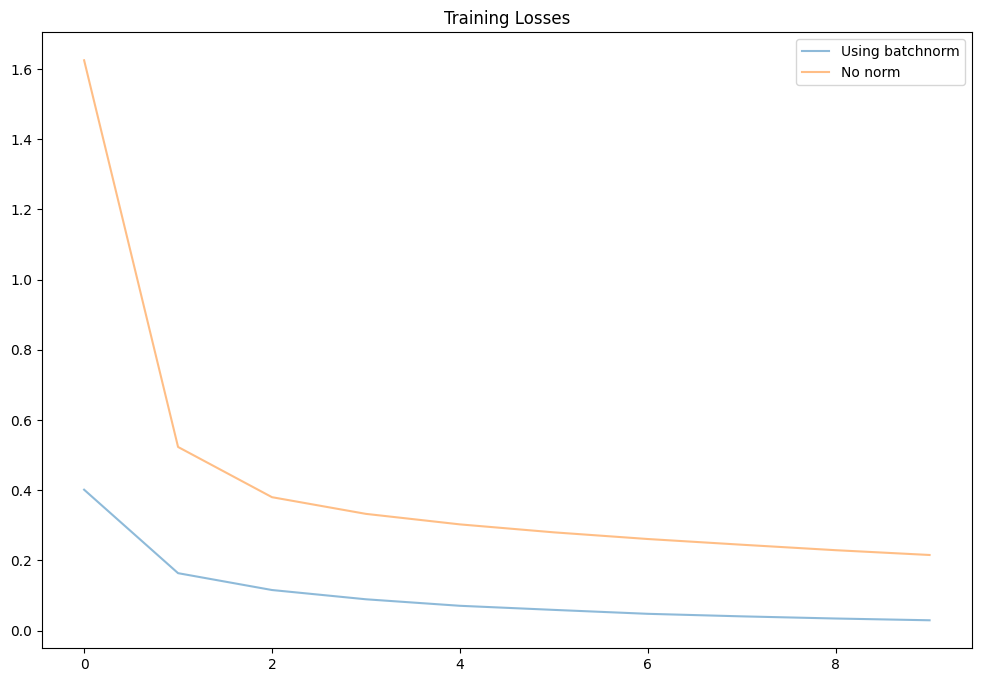

In [28]:
# compare
fig, ax = plt.subplots(figsize=(12,8))
with torch.no_grad():
  losses_batchnorm = np.array(losses_batchnorm)
  losses_no_norm = np.array(losses_no_norm)
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("Training Losses")
plt.legend()

Шаг 8. Создадим функцию для тестирования модели.
Заметим, что на этапе тренировки суммарные потери с Batch Normalization ниже, чем для обычной модели.

In [30]:
def test(model, train):
    # initialize vars to monitor test loss and accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # set model to train or evaluation mode
    # just to see the difference in behavior
    if(train==True):
        model.train()
    if(train==False):
        model.eval()

    # loss criterion
    criterion = nn.CrossEntropyLoss()

    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)

        # forward pass: compute predicted outputs by passing inputs to the model
        data = data.view(data.shape[0], -1)
        outp = model(data)
        loss = criterion(outp, target)
        # update average test loss
        test_loss += loss.item()*batch_size
        # convert output probabilities to predicted class
        _, pred = torch.max(outp, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (class_total[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

Шаг 9. Запустим режим тестирования на этапе тренировки и этапах оценки. Обращаю внимание, что на этапе тренировки слой Batch Normalization использует статистику по каждому пакету (batch), в то время как на этапе тестирования статистика считается для всего множества в целом.

In [31]:
# test batchnorm case, in *train* mode
test(net_batchnorm, train=True)

Test Loss: 0.078780

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 96% (999/1032)
Test Accuracy of     3: 97% (987/1010)
Test Accuracy of     4: 97% (956/982)
Test Accuracy of     5: 97% (872/892)
Test Accuracy of     6: 97% (934/958)
Test Accuracy of     7: 97% (1000/1028)
Test Accuracy of     8: 97% (947/974)
Test Accuracy of     9: 96% (976/1009)

Test Accuracy (Overall): 97% (9769/10000)


In [32]:
# test batchnorm case, in *evaluation* mode
test(net_batchnorm, train=False)

Test Loss: 0.065569

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 98% (1012/1032)
Test Accuracy of     3: 98% (994/1010)
Test Accuracy of     4: 97% (961/982)
Test Accuracy of     5: 98% (875/892)
Test Accuracy of     6: 97% (938/958)
Test Accuracy of     7: 97% (998/1028)
Test Accuracy of     8: 96% (941/974)
Test Accuracy of     9: 97% (982/1009)

Test Accuracy (Overall): 97% (9797/10000)


In [33]:
# for posterity, test no norm case in eval mode
test(net_no_norm, train=False)

Test Loss: 0.205916

Test Accuracy of     0: 98% (961/980)
Test Accuracy of     1: 98% (1116/1135)
Test Accuracy of     2: 93% (963/1032)
Test Accuracy of     3: 93% (947/1010)
Test Accuracy of     4: 94% (932/982)
Test Accuracy of     5: 89% (797/892)
Test Accuracy of     6: 96% (920/958)
Test Accuracy of     7: 93% (964/1028)
Test Accuracy of     8: 89% (876/974)
Test Accuracy of     9: 91% (925/1009)

Test Accuracy (Overall): 94% (9401/10000)


## Batch Normalization до или после Dropout

### После

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/batchnormalization_after_dropout.png" width="600">

* **Плохо**: В режиме обучения **Dropout** будет отключать (занулять) выходы слоя активации, из-за этого накопленные в режиме обучения **значения скользящего среднего матожидания и дисперсии** для вычисления **Batch Normalization** в режиме тестирования будут иметь **сдвиг**, который приведет к нестабильной работе нейросети.


Подробно об этом можно почитать в [статье](https://arxiv.org/pdf/1801.05134.pdf) и [блокноте](https://github.com/adelizer/kaggle-sandbox/blob/master/drafts/dropout_bn.ipynb).

### До

<img src ="https://edunet.kea.su/repo/EduNet-content/L07/out/batchnormalization_before_dropout.png" width="600">

* **Лучше**: Меньше влияние сдвига от **Dropout** на **BatchNorm**. Но если на предыдущих слоях есть **Dropout**, то значения все равно могут быть смещены.  

### Ставить только что-то одно

* **Dropout** может отрицательно влиять на качество нейросети с **BatchNorm** за счет разного поведения на train и test. Лучше не ставить **Dropout** раньше **BatchNorm**.

### Строго говоря

* Оптимальный порядок следования слоев зависит от задачи и архитектуры сети.
* Возможно, стоит применять другие виды нормализации.
* Если используем **BatchNormalization**, то надо уменьшить силу **Dropout** и **L2**-регуляризации.

In [34]:
def batchNormalization(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    """
    X - dataset
    gamma - scale parameter  параметр масштабирования
    beta - shift parameter  параметр сдвига
    moving_mean - used during inference
    moving_var - used during inference
    eps - малая константа для численной стабильности
    momentum - используется для обновления скользящих средних
    """
    # Checking if not training mode
    if not torch.is_grad_enabled():
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)

    else:  # В режиме обучения вычисляются среднее и дисперсия текущего батча и обновляются скользящие средние
        assert len(X.shape) in (2, 4)
        #Feed-Forward layer
        if len(X.shape) == 2:
            mean = X.mean(dim=0)
            var = ((X - mean)**2).mean(dim=0)

        else:
            #Convolutional Layer
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean)**2).mean(dim=(0, 2, 3), keepdim=True)

        X_hat = (X - mean) / torch.sqrt(var + eps)
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var

    Y = gamma * X_hat + beta
    return Y, moving_mean.data, moving_var.data

class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)

        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))

        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):  # метод берет входные данные X и применяет функцию батч-нормализации, возвращая нормализованный вывод Y
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)

        Y, self.moving_mean, self.moving_var = batchNormalization(
            X, self.gamma, self.beta, self.moving_mean, self.moving_var,
            eps=1e-5, momentum=0.9)

        return Y